In [1]:
# importing  required libraries
import pandas as pd
from pandas import Series, DataFrame

import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# Render plots inline
%matplotlib inline

In [2]:
!pip install seaborn --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 8.7 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.9.0
    Uninstalling seaborn-0.9.0:
      Successfully uninstalled seaborn-0.9.0


In [6]:
!pip3 install seaborn==0.9.0


In [7]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
file_id='1JIyAGw6YcJECSOfnTtgl_-zOL1USUZIg'
link = f'https://drive.google.com/uc?id={file_id}'
titanic_df= pd.read_csv(link)

In [9]:
titanic_df.shape

(891, 12)

In [10]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [11]:
# get overall info for the dataset
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
!pip install seaborn --upgrade

  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.9.0
    Uninstalling seaborn-0.9.0:
      Successfully uninstalled seaborn-0.9.0


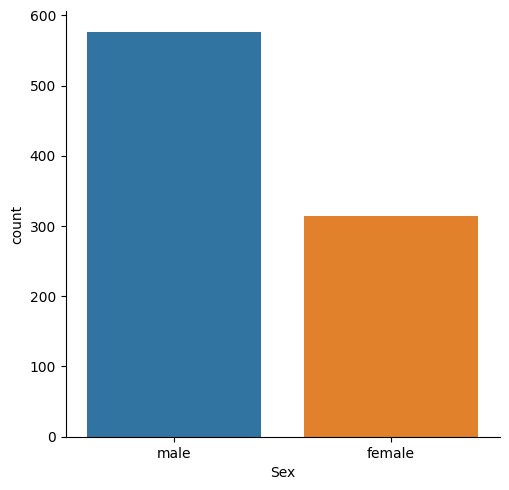

In [15]:
sns.factorplot('Sex', data=titanic_df, kind="count")
#sns.factorplot('Sex', data=titanic_df)

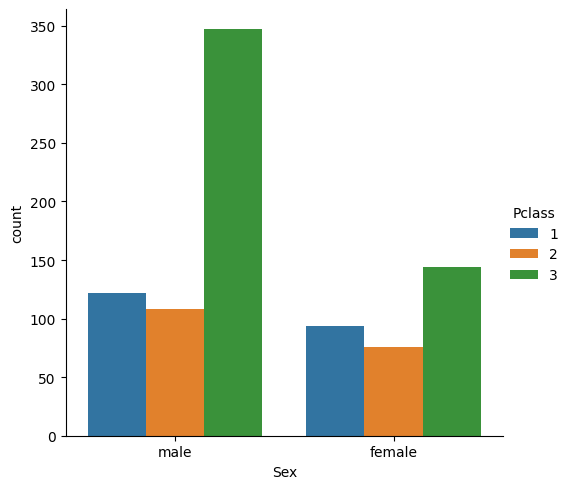

In [18]:
# Now let's seperate the genders by classes, we can use the 'hue' arguement here!

#sns.factorplot('Sex', data=titanic_df, hue='Pclass')
# Now let's seperate the genders by classes, we can use the 'hue' arguement here!

sns.factorplot('Sex', data=titanic_df, kind="count", hue='Pclass')

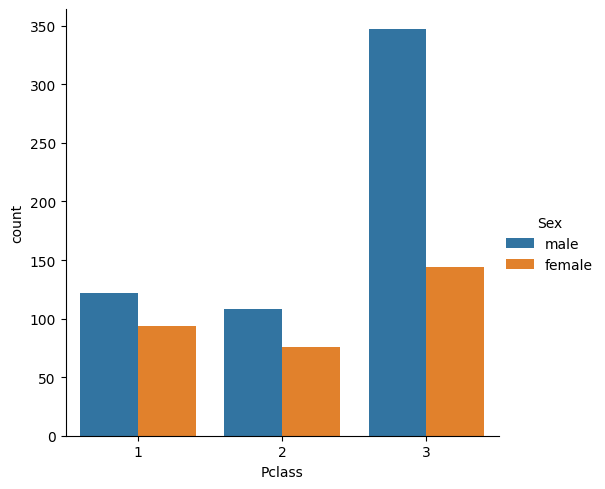

In [21]:
#sns.factorplot('Pclass', data=titanic_df,hue='Sex')
sns.factorplot('Pclass', data=titanic_df, kind="count", hue='Sex')

In [22]:
# We'll treat anyone as under 16 as a child, and then use the apply technique with a function to create a new column

# First let's make a function to sort through the sex
def male_female_child(passenger):
    # Take the Age and Sex
    age,sex = passenger
    # Compare the age, otherwise leave the sex
    if age < 16:
        return 'child'
    else:
        return sex

In [24]:
# Define a new column called 'person', remember to specify axis=1 for columns and not index

titanic_df['Person']= titanic_df[['Age','Sex']].apply(male_female_child, axis=1)

In [23]:
# Let's see if this worked, check out the first ten rows
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.


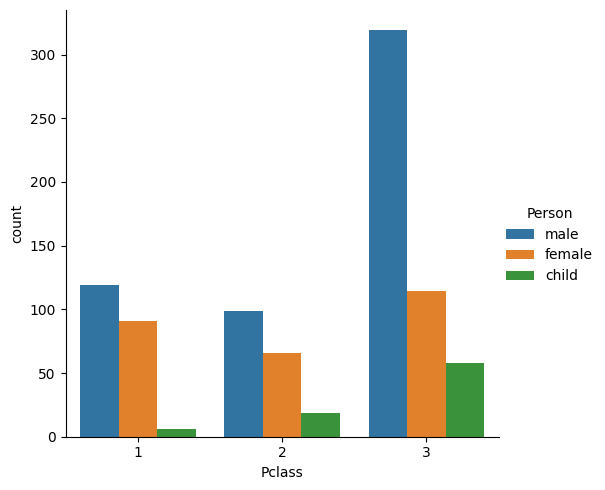

In [25]:
# Let's try the factorplot again!
sns.factorplot('Pclass', data=titanic_df,kind='count', hue='Person')

<Axes: >

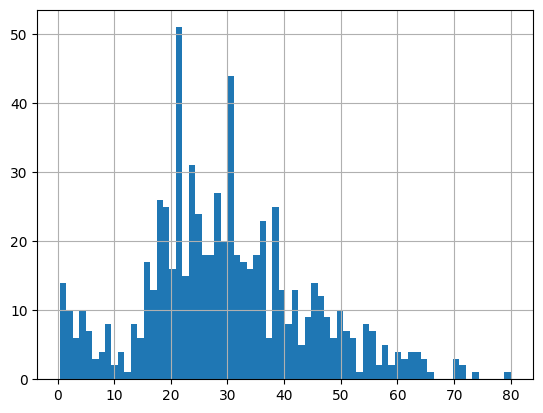

In [26]:
# Quick way to create a histogram using pandas
titanic_df['Age'].hist(bins=70)

In [27]:
titanic_df['Age'].mean() # Get the mean of Age

# We could also get a quick overall comparison of male,female,child

titanic_df['Person'].value_counts()

male      537
female    271
child      83
Name: Person, dtype: int64

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:747: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  # Some matplotlib functions don't handle pandas objects correctly
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:747: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  # Some matplotlib functions don't handle pandas objects correctly


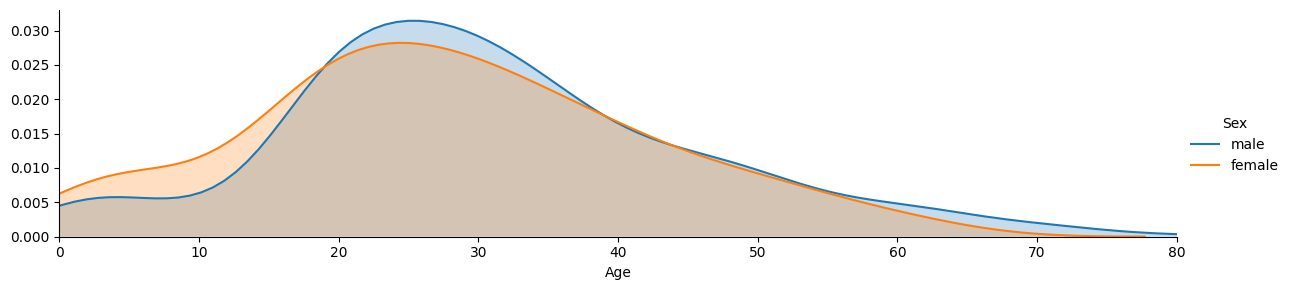

In [28]:
# Another way to visualize the data is to use FacetGrid to plot multiple kedplots on one plot

# Set the figure equal to a facetgrid with the pandas dataframe as its data source, set the hue, and change the aspect ratio.
fig = sns.FacetGrid(titanic_df, hue="Sex",aspect=4)

# Next use map to plot all the possible kdeplots for the 'Age' column by the hue choice
fig.map(sns.kdeplot,'Age',shade= True)

# Set the x max limit by the oldest passenger
oldest = titanic_df['Age'].max()

#Since we know no one can be negative years old set the x lower limit at 0
fig.set(xlim=(0,oldest))

#Finally add a legend
fig.add_legend()


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:747: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  # Some matplotlib functions don't handle pandas objects correctly
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:747: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  # Some matplotlib functions don't handle pandas objects correctly
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:747: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  # Some matplotlib functions don't handle pandas objects correctly


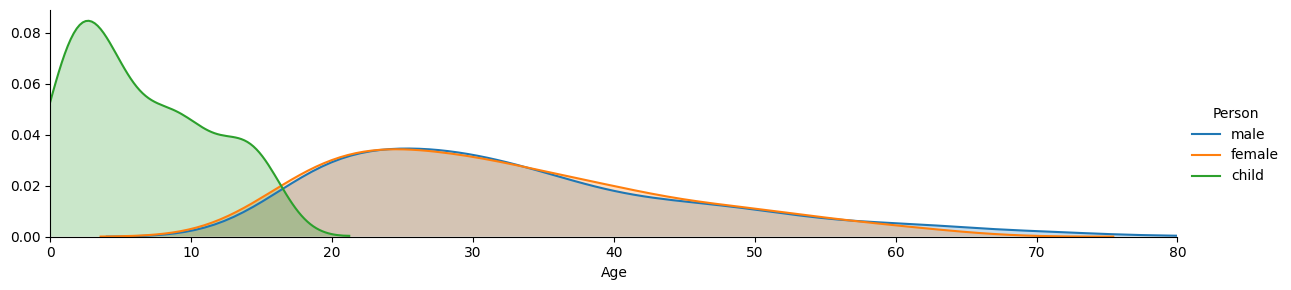

In [29]:
# We could have done the same thing for the 'person' column to include children:

fig = sns.FacetGrid(titanic_df, hue='Person', aspect=4)

fig.map(sns.kdeplot, 'Age',shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim= (0,oldest))

fig.add_legend()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:747: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  # Some matplotlib functions don't handle pandas objects correctly
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:747: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  # Some matplotlib functions don't handle pandas objects correctly
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:747: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  # Some matplotlib functions don't handle pandas objects correctly


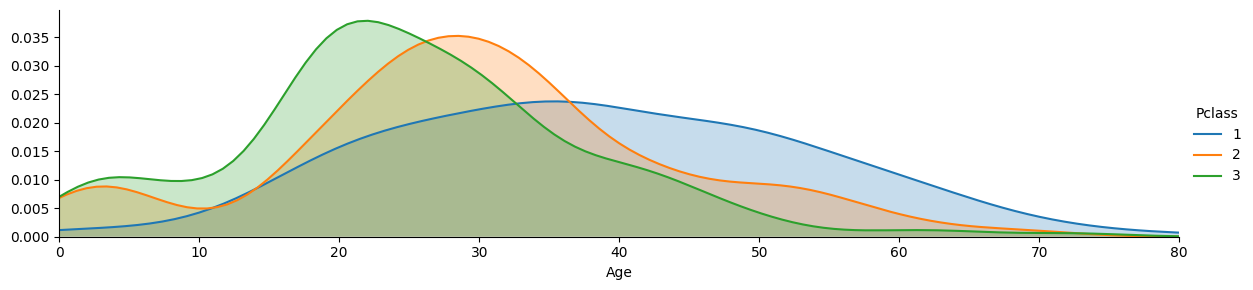

In [30]:
# Let's do the same for class by changing the hue argument:

fig = sns.FacetGrid(titanic_df, hue='Pclass', aspect=4)

fig.map(sns.kdeplot, 'Age',shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim= (0,oldest))

fig.add_legend()


In [31]:
# Let's get a quick look at our dataset again

titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


In [32]:
# First we'll drop the NaN values and create a new object, deck

deck = titanic_df['Cabin'].dropna()

In [33]:
# Quick preview of the decks
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.


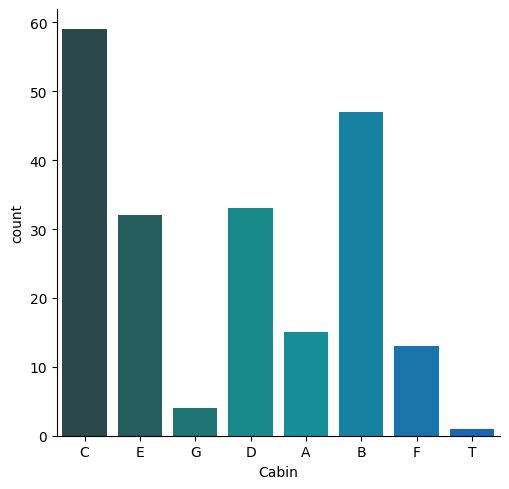

In [35]:
# So let's grab that letter for the deck level with a simple for loop
# Set empty list
levels = []

# Loop to grab first letter
for level in deck:
    levels.append(level[0])

# Reset DataFrame and use factor plot
cabin_df = DataFrame(levels)

cabin_df.columns = ['Cabin']

sns.factorplot('Cabin', data=cabin_df, palette='winter_d', kind='count')

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.


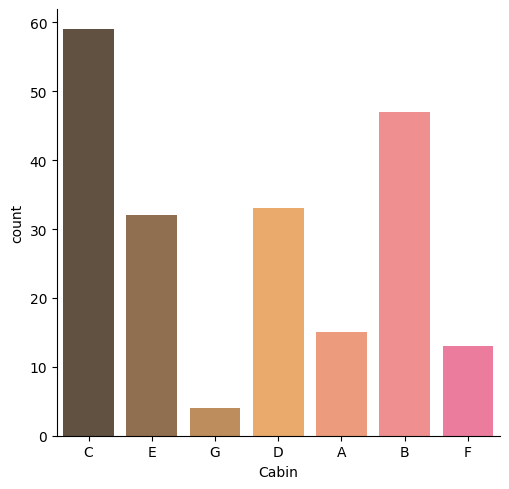

In [36]:
# Redefine cabin_df as everything but where the row was equal to 'T'
cabin_df = cabin_df[cabin_df.Cabin != 'T']
#Replot
sns.factorplot('Cabin', data=cabin_df, palette='spring_d', kind='count')

In [37]:
titanic_df.head(10) # Let's take another look at our original data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.


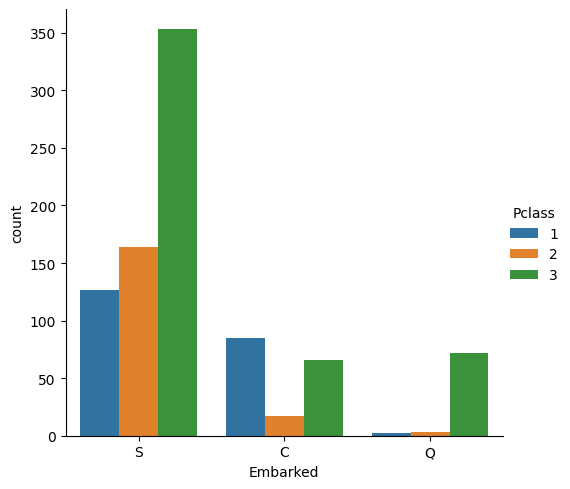

In [38]:
# Now, make a quick factorplot to check out the results, note the x_order argument, used to deal with NaN values

sns.factorplot('Embarked',kind='count', data=titanic_df, hue = 'Pclass')

In [39]:
# Let's start by adding a new column to define alone

# add the parent/child column with the sibsp column

titanic_df['Alone'] =  titanic_df.Parch + titanic_df.SibSp
titanic_df['Alone']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: Alone, Length: 891, dtype: int64

In [40]:
# Look for >0 or ==0 to set alone status
titanic_df['Alone'].loc[titanic_df['Alone'] >0] = 'With Family'
titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Alone'

<ipython-input-40-54f716244070>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df['Alone'].loc[titanic_df['Alone'] >0] = 'With Family'


In [41]:
# Check to make sure it worked

titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


In [42]:
titanic_df['Alone']

0      With Family
1      With Family
2            Alone
3      With Family
4            Alone
          ...     
886          Alone
887          Alone
888    With Family
889          Alone
890          Alone
Name: Alone, Length: 891, dtype: object

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.


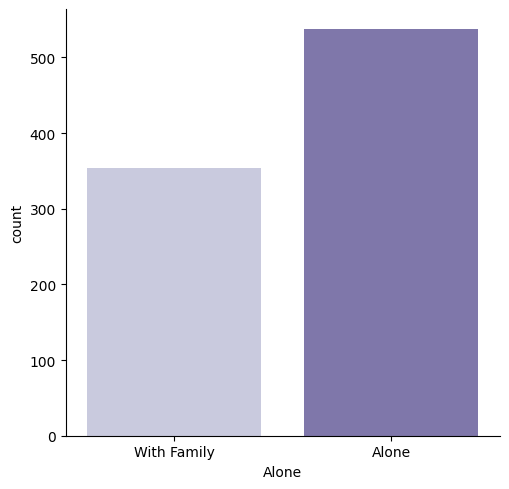

In [43]:
# Now let's get a simple visualization!

sns.factorplot('Alone',kind='count', data=titanic_df, palette='Purples')

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.


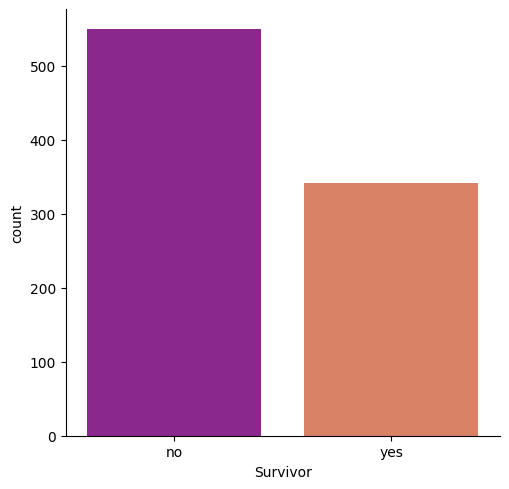

In [44]:
# Let's start by creating a new column for legibility purposes through mapping
titanic_df['Survivor'] = titanic_df.Survived.map({0:'no', 1:'yes'})

# Let's just get a quick overall view of survied vs died.
sns.factorplot('Survivor',kind='count', data=titanic_df, palette='plasma')

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.


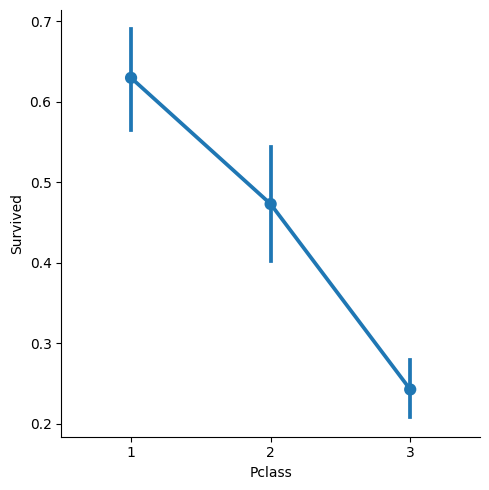

In [45]:
#sns.factorplot(x ='Pclass', y ='Survived',hue = 'sex', data =titanic_df)
sns.factorplot('Pclass','Survived', data =titanic_df)

# Show the plot
#sns.plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.


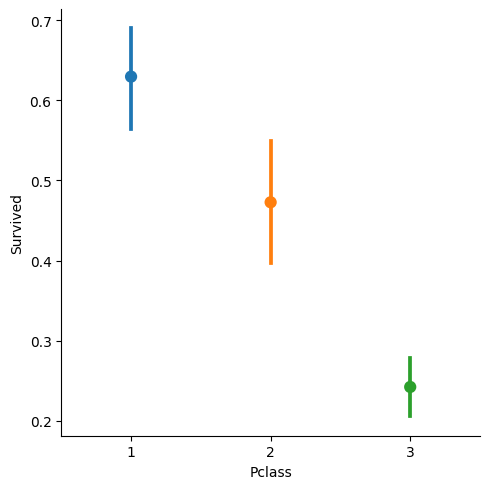

In [46]:
# use a factor plot again, but now considering class

sns.factorplot('Pclass','Survived', hue='Pclass', data=titanic_df)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.


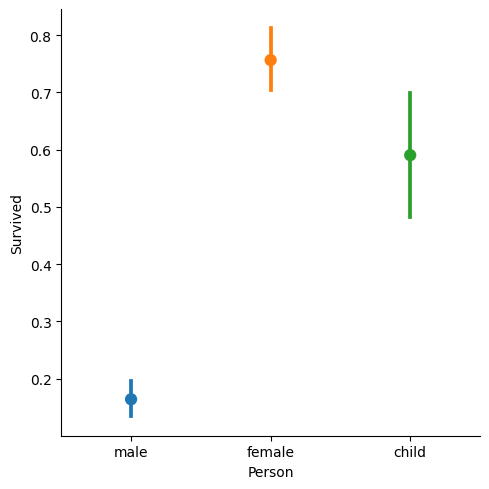

In [47]:
# Let's use a factor plot again, but now considering class and gender

sns.factorplot('Person','Survived', hue='Person', data=titanic_df)

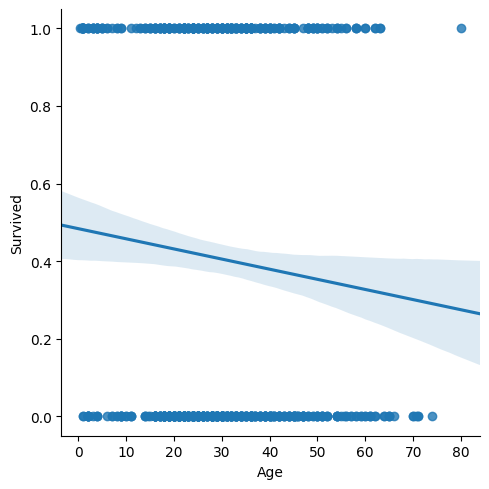

In [48]:
# Use a linear plot on age versus survival

sns.lmplot('Age','Survived', data=titanic_df)

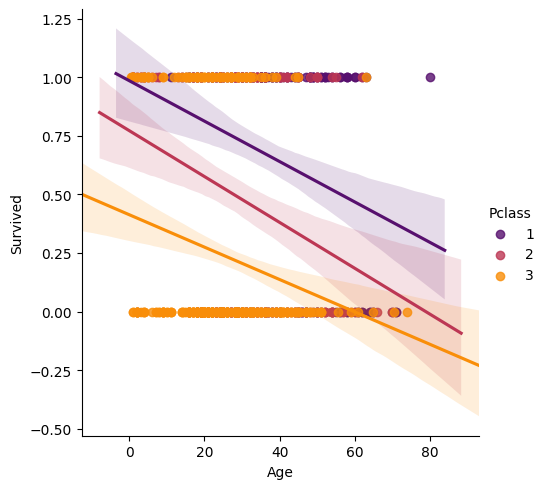

In [49]:
# Let's use a linear plot on age versus survival using hue for class seperation

sns.lmplot('Age','Survived',hue='Pclass', data=titanic_df, palette='inferno')

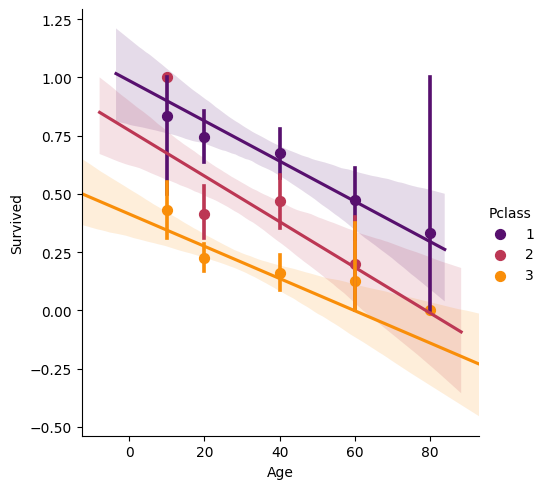

In [50]:
# Let's use a linear plot on age versus survival using hue for class seperation

# For X_bins
generations=[10,20,40,60,80]

sns.lmplot('Age','Survived',hue='Pclass', data=titanic_df, palette='inferno',x_bins=generations)

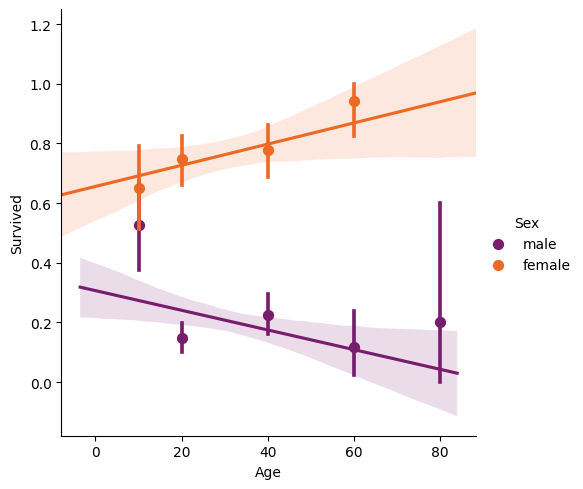

In [51]:
sns.lmplot('Age','Survived',hue='Sex', data=titanic_df, palette='inferno',x_bins=generations)

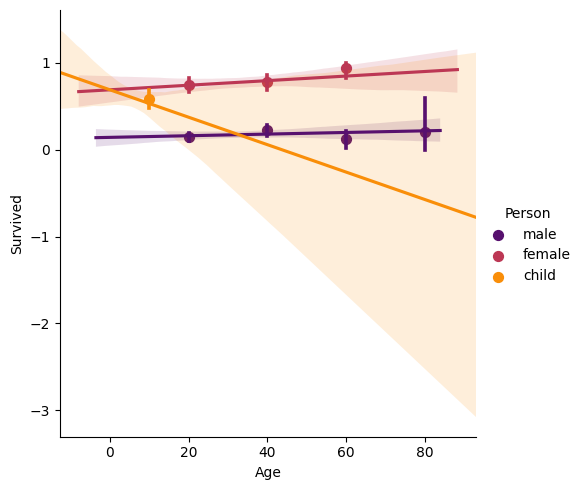

In [52]:
sns.lmplot('Age','Survived',hue='Person', data=titanic_df, palette='inferno',x_bins=generations)

In [53]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.


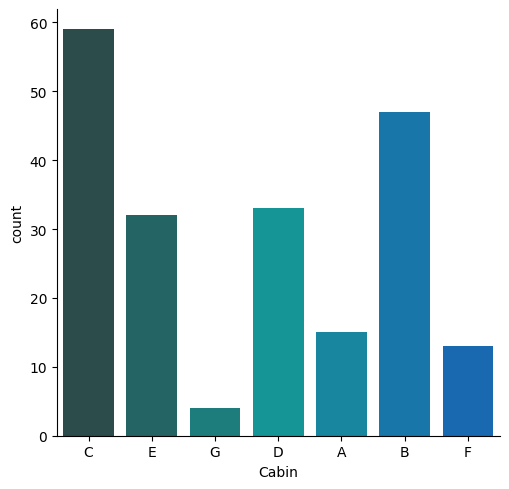

In [54]:
sns.factorplot('Cabin', data=cabin_df, palette='winter_d',kind='count')

In [55]:
cabin_df.head()

,Cabin
0,C
1,C
2,E
3,G
4,C


In [56]:
cabin_df = pd.concat([cabin_df, titanic_df['Sex']], axis=1)
cabin_df = pd.concat([cabin_df, titanic_df['Survived']], axis=1)
cabin_df.head()

,Cabin,Sex,Survived
0,C,male,0
1,C,female,1
2,E,female,1
3,G,female,1
4,C,male,0


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.


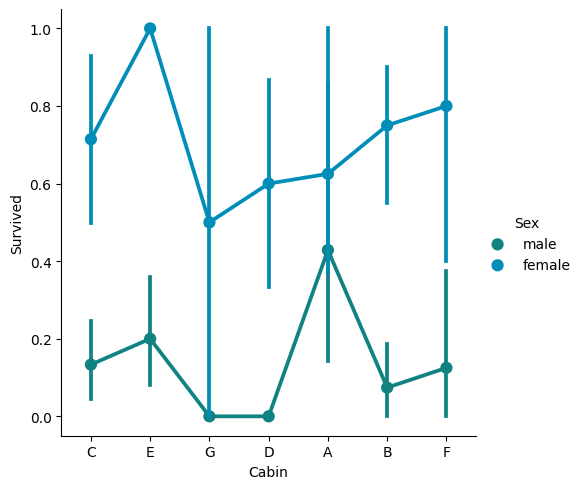

In [57]:
sns.factorplot('Cabin','Survived',data=cabin_df, hue='Sex', palette='winter_d')

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.


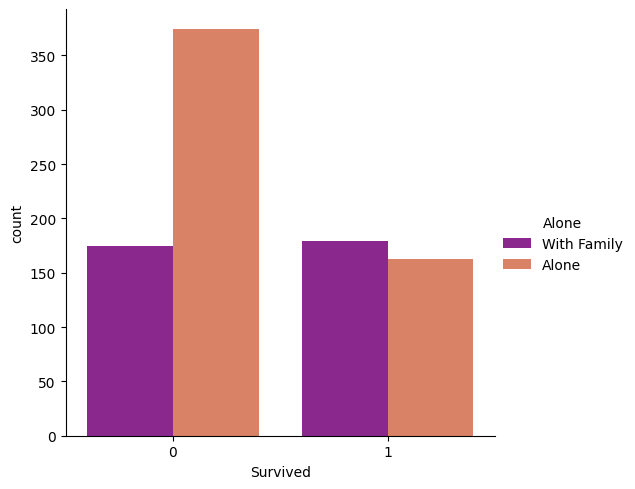

In [59]:
sns.factorplot('Survived',data=titanic_df, hue='Alone',palette='plasma',kind='count')

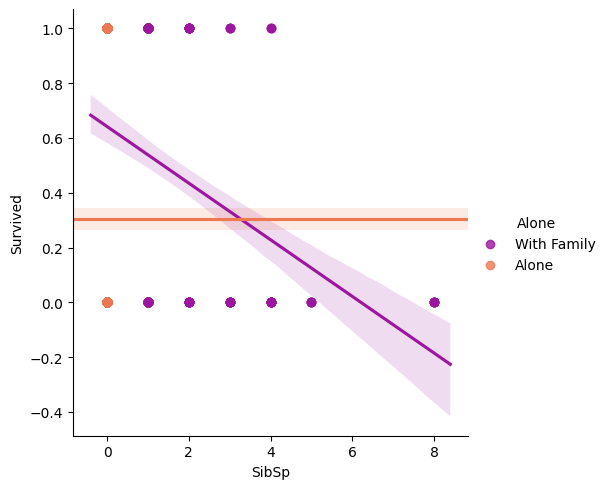

In [58]:
sns.lmplot('SibSp','Survived',data=titanic_df, hue='Alone',palette='plasma')

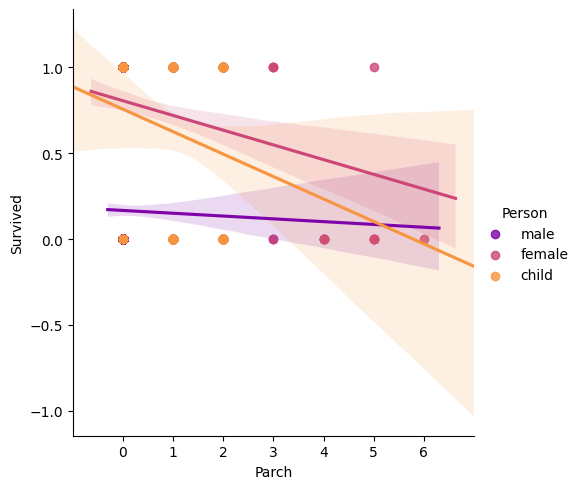

In [60]:
sns.lmplot('Parch','Survived',data=titanic_df, hue='Person',palette='plasma')

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.


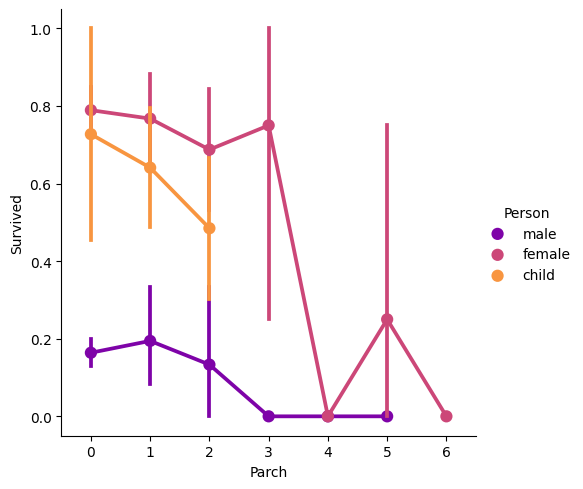

In [61]:
sns.factorplot('Parch','Survived',data=titanic_df, hue='Person',palette='plasma')

Conclsion:
Our complete analysis mainly covered three factors in this anlysis (Age, Sex, Pclass).

Age: Doesn't play much role in determining the survival chances, except for ages below 1 years.
Sex: Women had better chances of survival than men.
In general, Women & children across all classes had higer survival rates than men.
Pclass: Pclass-1 had best while Pclass-3 has the worst survival rate.
So we can say, that being a women in Pclass-1 seems to have the best chances of survival. However being a child or woman could not be considered as 100% survival chance